In [161]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.preprocessing import normalize
import tensorflow_datasets as tfds

In [17]:
data = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [162]:
digits_data = np.array(data[0][0])
digits_label = np.array(data[0][1])

In [163]:
print(digits_data.shape,digits_label.shape)

(60000, 28, 28) (60000,)


In [164]:
data_69 = np.array([])
label_69 = np.array([])

In [165]:
data_69 = np.array([normalize(digits_data[i].reshape(1,784), norm='l1') for i in range(5020) if ((digits_label[i] == 6 or digits_label[i]==9))])
label_69 = np.array([digits_label[i] for i in range(5020) if (digits_label[i] == 6 or digits_label[i]==9)])

In [166]:
data_69 = data_69.reshape(1000,784)

In [167]:
print(data_69.shape,label_69.shape)

(1000, 784) (1000,)


In [416]:
def partition_func(l,Y):
    return np.sum(np.exp(-np.dot(l,Y)),axis=1)

def loss(data, l, Y): 
    z = partition_func(l,Y)
    term_1 = np.sum(np.log(z))
    term_2 = np.sum(np.multiply(data,np.dot(l,Y)))
    return term_1 + term_2

def q_calc(l,Y):
    z = partition_func(l,Y)
    return np.exp(-np.dot(l,Y))/z[:,None]

def grad_descent_step(l,Y,data,eta):
    pred = q_calc(l,Y)
    dcdl = np.dot(data,Y.T) - np.dot(pred,Y.T)
    dcdy = np.dot(l.T,data) - np.dot(l.T,pred)
    dcdlnorm = norm(dcdl)/norm(l)
    dcdynorm = norm(dcdy)/norm(Y)
    l = l - eta*dcdl
    Y = Y - eta*dcdy 
    return l, Y, dcdlnorm, dcdynorm

def grad_descent(l,Y,data,eta,n):
    loss_list = []
    dcdl_list = []
    dcdy_list = []
    for i in range(n):
        l, Y, dcdl, dcdy = grad_descent_step(l,Y,data,0.01)
        dcdl_list.append(dcdl)
        dcdy_list.append(dcdy)
        loss_list.append(loss(data, l, Y))
    return loss_list, dcdl_list, dcdy_list, l, Y

def lambda_descent_step(l,Y,data,eta):
    pred = q_calc(l,Y)
    dcdl = np.dot(data,Y.T) - np.dot(pred,Y.T)
    #dcdy = np.dot(l.T,data) - np.dot(l.T,pred)
    dcdlnorm = norm(dcdl)/norm(l)
    #dcdynorm = norm(dcdy)/norm(Y)
    l = l - eta*dcdl
    #Y = Y - eta*dcdy 
    return l, dcdlnorm#, dcdynorm

def lambda_descent(l,Y,data,eta,n):
    loss_list = []
    dcdl_list = []
    #dcdy_list = []
    for i in range(n):
        l, dcdl = lambda_descent_step(l,Y,data,eta)
        dcdl_list.append(dcdl)
        #dcdy_list.append(dcdy)
        loss_list.append(loss(data, l, Y))
    return loss_list, dcdl_list, l

In [417]:
lamb_in = np.random.default_rng().uniform(0.2,0.5,(1000,2))
y_in = np.random.default_rng().uniform(0.2,0.5,(2,784))

In [421]:
loss(data_69,lamb_in,y_in)

6670.8466910145125

In [419]:
loss_list, dcdl_list, dcdy_list, lamb, y = grad_descent(lamb_in, y_in, data_69, 0.01,1000)

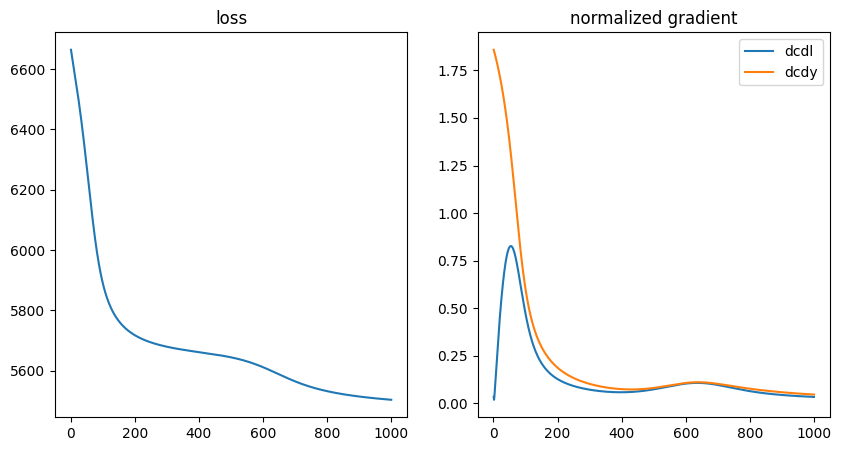

In [422]:
x = np.linspace(1,1000,1000)
fig, axis = plt.subplots(1,2,figsize=(10,5))
axis[0].plot(x,loss_list)
axis[0].set_title('loss')
axis[1].plot(x,dcdl_list, label='dcdl')
axis[1].set_title('normalized gradient')
axis[1].plot(x,dcdy_list, label='dcdy')
plt.legend()
plt.show()

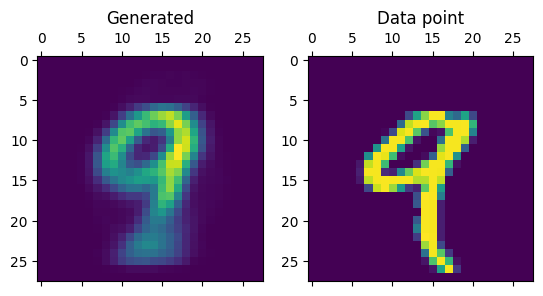

In [423]:
fig, axis = plt.subplots(1,2)
axis[0].matshow(q_calc(lamb,y)[0].reshape(28,28))
axis[0].set_title("Generated")
axis[1].matshow(data_69[0].reshape(28,28))
axis[1].set_title("Data point")
plt.show()

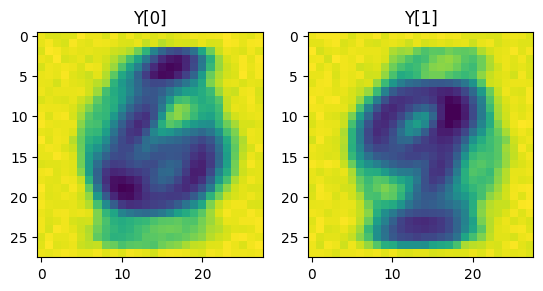

In [424]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(y[0].reshape(28,28))
axis[1].imshow(y[1].reshape(28,28))
axis[0].set_title("Y[0]")
axis[1].set_title("Y[1]")
#axis[0].tick_params(left= False, top = False)
#axis[1].tick_params(left= False, top = False)
plt.show()

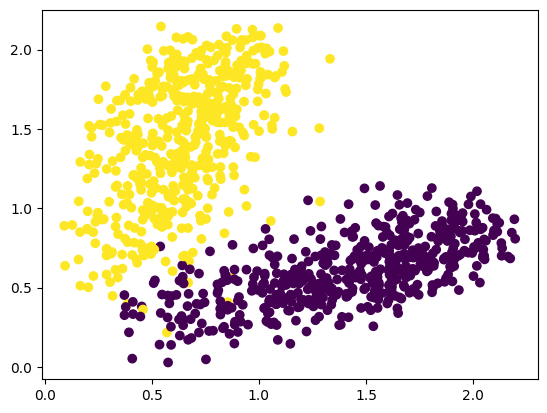

In [425]:
plt.scatter(lamb.T[0],lamb.T[1],c=label_69)
plt.show()

# Adding one new data point

In [666]:
new_data = normalize(digits_data[6000].reshape(1,784), norm='l1')

In [721]:
lamb_new = -np.dot(np.log(new_data+10**(-3.5)),np.linalg.pinv(np.vstack([y, np.ones(784)]))).reshape(3)[:2].reshape(1,2)

In [671]:
lamb_new_descent = np.random.default_rng().uniform(0.2,0.5,(1,2))

In [672]:
loss_list, dcdl_list, lamb_new_descent = lambda_descent(lamb_new_descent, y, new_data, 0.01,1000)

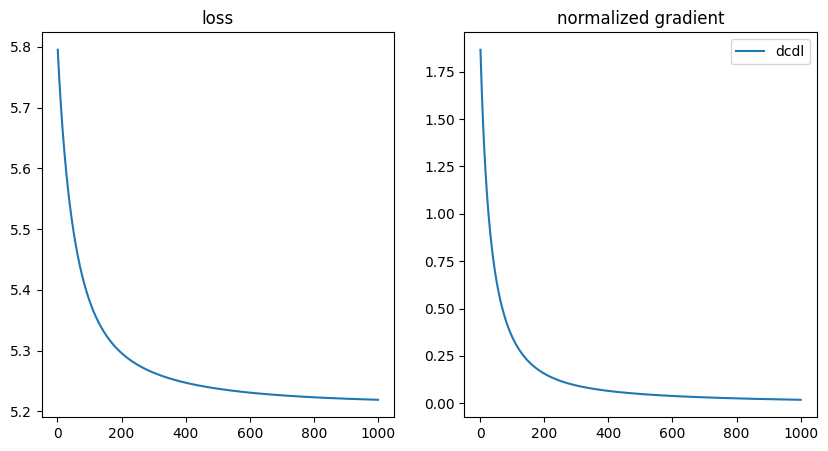

In [673]:
x = np.linspace(1,1000,1000)
fig, axis = plt.subplots(1,2,figsize=(10,5))
axis[0].plot(x,loss_list)
axis[0].set_title('loss')
axis[1].plot(x,dcdl_list, label='dcdl')
axis[1].set_title('normalized gradient')
#axis[1].plot(x,dcdy_list, label='dcdy')
plt.legend()
plt.show()

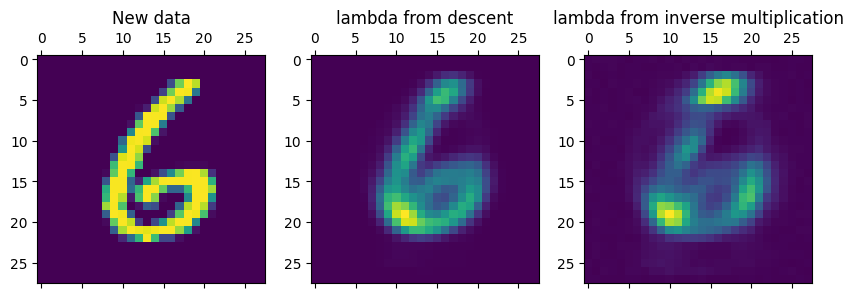

In [722]:
fig, axis = plt.subplots(1,3,figsize=(10,30))
axis[1].matshow(q_calc(lamb_new_descent,y).reshape(28,28))
axis[1].set_title("lambda from descent")
axis[2].matshow(q_calc(lamb_new,y).reshape(28,28))
axis[2].set_title("lambda from inverse multiplication")
axis[0].matshow(new_data.reshape(28,28))
axis[0].set_title("New data")
plt.show()

# Adding multiple data points

In [706]:
data_2 = np.array([normalize(digits_data[i].reshape(1,784), norm='l1') for i in range(6000,6050) if ((digits_label[i] == 6 or digits_label[i]==9))])

In [727]:
lamb_2= -np.dot(np.log(data_2.reshape(10,784)+10**(-3.5)),np.linalg.pinv(np.vstack([y, np.ones(784)])))[:,:2].reshape(-1,2)

In [710]:
lamb_2_in = np.random.default_rng().uniform(0.2,0.5,(10,1,2))

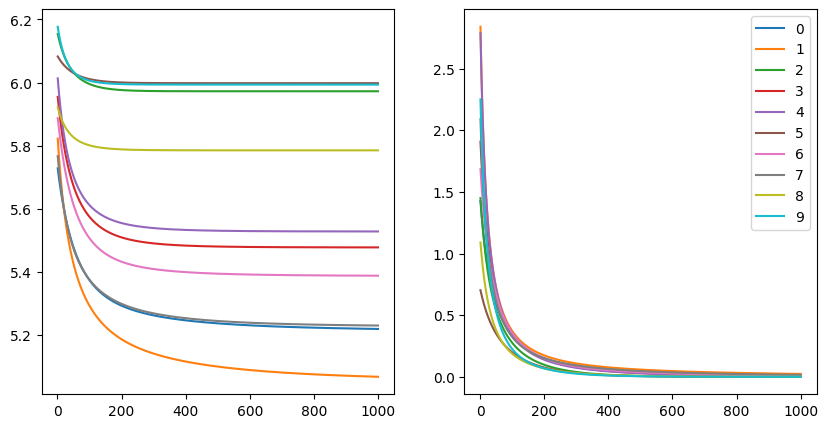

In [711]:
x = np.linspace(1,1000,1000)
i=0
fig, axis = plt.subplots(1,2,figsize=(10,5))
lamb_2_descent = []
for lam, d in zip(lamb_2_in,data_2):
    loss_list, dcdl_list, lam = lambda_descent(lam, y, d, 0.01,1000)
    axis[0].plot(x,loss_list,label=i)
    axis[1].plot(x,dcdl_list, label=i)
    i = i+1
    lamb_2_descent.append(lam)
plt.legend()
plt.show()

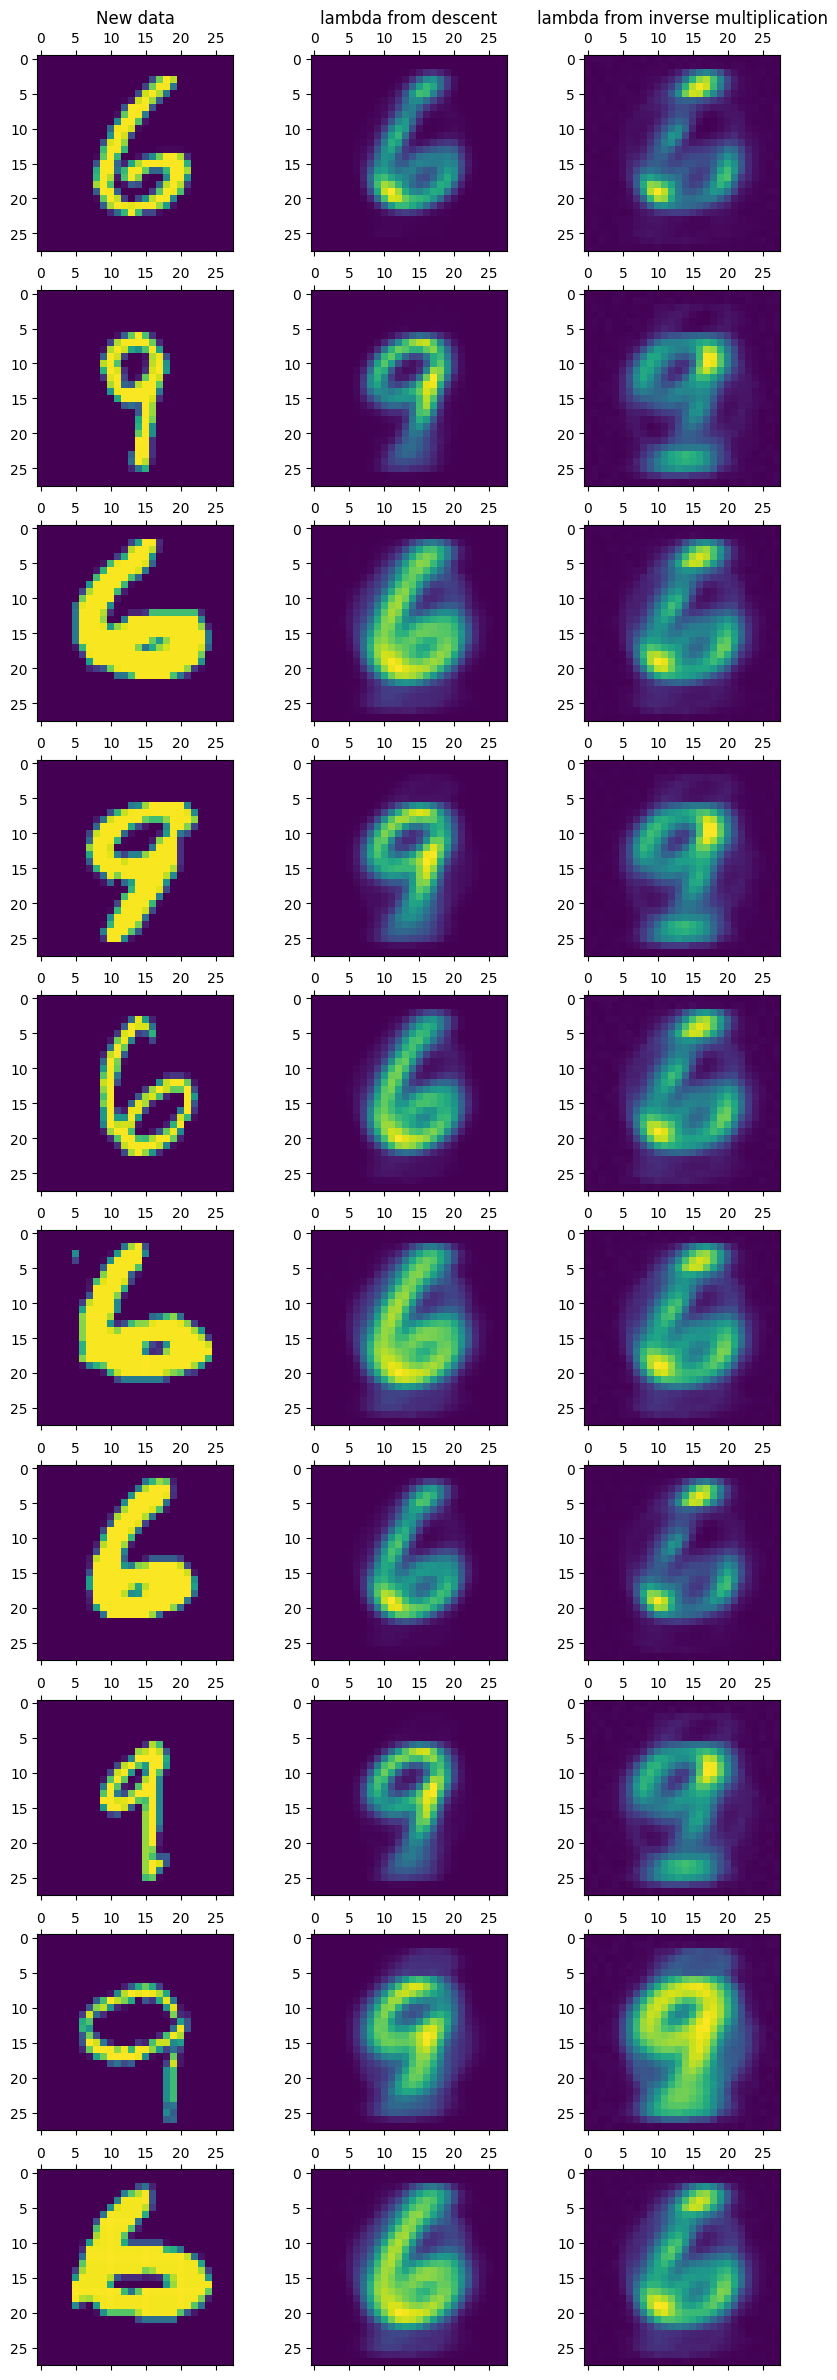

In [728]:
fig, axis = plt.subplots(10,3,figsize=(10,30))
axis[0][1].set_title("lambda from descent")
axis[0][2].set_title("lambda from inverse multiplication")
axis[0][0].set_title("New data")
for i in range(10):
    axis[i][1].matshow(q_calc(lamb_2_descent[i],y).reshape(28,28))
    axis[i][2].matshow(q_calc(lamb_2[i].reshape(1,2),y).reshape(28,28))
    axis[i][0].matshow(data_2[i].reshape(28,28))
plt.show()